##milopy basic installation and tutorial##

In [19]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

import milopy.core as milo
import milopy.plot as milopl

In [20]:
# adata = sc.datasets.pbmc3k_processed()
# adata

adata = sc.read_h5ad('/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSE148218_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'SEACell'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [21]:
adata.obs_names = [a + "_" + b for a,b in zip(adata.obs.sample_id, adata.obs_names)]
adata.obs

,patient_id,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,SEACell
GSM4456251_ALL1_AAACCTGAGAGATGAG-1,GSM4,GSM4456251_ALL1,1982,1982,7866.0,195.0,2.479024,8,SEACell-70
GSM4456251_ALL1_AAACCTGAGCACACAG-1,GSM4,GSM4456251_ALL1,296,296,593.0,82.0,13.827993,8,SEACell-27
GSM4456251_ALL1_AAACCTGAGGATGGAA-1,GSM4,GSM4456251_ALL1,1333,1333,12130.0,102.0,0.840890,16,SEACell-67
GSM4456251_ALL1_AAACCTGAGGGTGTGT-1,GSM4,GSM4456251_ALL1,208,208,6029.0,3.0,0.049759,15,SEACell-46
GSM4456251_ALL1_AAACCTGCACAACTGT-1,GSM4,GSM4456251_ALL1,1170,1170,3677.0,119.0,3.236334,8,SEACell-74
...,...,...,...,...,...,...,...,...,...
GSM4795826_REH_XR_TTTGATCAGGTAAAGG-1,GSM4,GSM4795826_REH_XR,840,840,1694.0,13.0,0.767414,14,SEACell-1
GSM4795826_REH_XR_TTTGATCAGGTCCAGA-1,GSM4,GSM4795826_REH_XR,3960,3960,18572.0,1080.0,5.815206,6,SEACell-0
GSM4795826_REH_XR_TTTGATCGTCCGGATC-1,GSM4,GSM4795826_REH_XR,4336,4335,23801.0,1046.0,4.394773,6,SEACell-44
GSM4795826_REH_XR_TTTGGTTGTACGTACT-1,GSM4,GSM4795826_REH_XR,4192,4192,18041.0,625.0,3.464331,18,SEACell-62


In [22]:
#use scanpy functions to build a KNN graph

d = 30
k = 50

sc.pp.neighbors(adata, n_neighbors=k, n_pcs=d)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)


In [23]:
#This step assigns cells to a set of representative neighbourhoods on the KNN graph.
milo.make_nhoods(adata)

In [24]:
adata

AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'SEACell', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'nhood_neighbors_key'
    obsm: 'X_pca', 'X_umap', 'nhoods'
    obsp: 'connectivities', 'distances'

In [25]:
adata.obsm["nhoods"]
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]


,nhood_ixs_refined,nhood_kth_distance
GSM4456251_ALL1_AAACGGGAGGTGCTAG-1,1,4.346492
GSM4456251_ALL1_AAAGCAACAGTTCATG-1,1,5.149691
GSM4456251_ALL1_AAAGCAAGTGGTCCGT-1,1,7.239192
GSM4456251_ALL1_AAAGCAATCGTTACAG-1,1,4.244872
GSM4456251_ALL1_AACCATGGTGCCTGCA-1,1,3.999865
...,...,...
GSM4795826_REH_XR_TTGAGTGAGCATAGGC-1,1,4.348753
GSM4795826_REH_XR_TTGGGTAAGGGCAGTT-1,1,4.998655
GSM4795826_REH_XR_TTTAGTCCAGATCACT-1,1,5.586977
GSM4795826_REH_XR_TTTCATGAGAACCGCA-1,1,3.644994


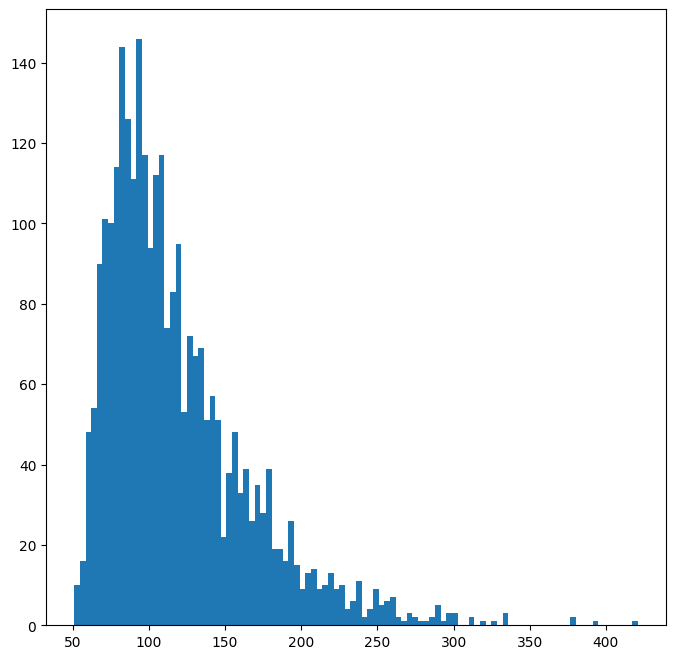

In [26]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);

In [27]:
adata.obs.nhood_ixs_refined.value_counts()

nhood_ixs_refined
0    50256
1     2751
Name: count, dtype: int64

In [28]:
adata.obsm['nhoods']

<53007x2751 sparse matrix of type '<class 'numpy.float32'>'
	with 325550 stored elements in Compressed Sparse Row format>

In [29]:
adata.obs_names[adata.obs["nhood_ixs_refined"] == 1]

Index(['GSM4456251_ALL1_AAACGGGAGGTGCTAG-1',
       'GSM4456251_ALL1_AAAGCAACAGTTCATG-1',
       'GSM4456251_ALL1_AAAGCAAGTGGTCCGT-1',
       'GSM4456251_ALL1_AAAGCAATCGTTACAG-1',
       'GSM4456251_ALL1_AACCATGGTGCCTGCA-1',
       'GSM4456251_ALL1_AACGTTGCAAAGTCAA-1',
       'GSM4456251_ALL1_AACGTTGTCAAAGTAG-1',
       'GSM4456251_ALL1_AACTCAGAGCGCCTCA-1',
       'GSM4456251_ALL1_AACTCAGGTCTTGCGG-1',
       'GSM4456251_ALL1_AACTCAGGTTGCGTTA-1',
       ...
       'GSM4795826_REH_XR_TTCCTTCTCTCCACTG-1',
       'GSM4795826_REH_XR_TTCGGTCTCCACAAGT-1',
       'GSM4795826_REH_XR_TTCTGTATCACAAGAA-1',
       'GSM4795826_REH_XR_TTCTTGAAGGGTCTTT-1',
       'GSM4795826_REH_XR_TTGACCCTCGGCCTTT-1',
       'GSM4795826_REH_XR_TTGAGTGAGCATAGGC-1',
       'GSM4795826_REH_XR_TTGGGTAAGGGCAGTT-1',
       'GSM4795826_REH_XR_TTTAGTCCAGATCACT-1',
       'GSM4795826_REH_XR_TTTCATGAGAACCGCA-1',
       'GSM4795826_REH_XR_TTTCATGCAAAGGCAC-1'],
      dtype='object', length=2751)

In [30]:
milo.count_nhoods(adata, sample_col="sample_id")

In [31]:
pd.DataFrame(adata.obsm['nhoods'].toarray())

,0,1,2,3,4,5,6,7,8,9,...,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
adata.uns["nhood_adata"]

AnnData object with n_obs × n_vars = 2751 × 11
    obs: 'index_cell', 'kth_distance'
    uns: 'sample_col'

In [33]:
adata.uns["nhood_adata"].obs

,index_cell,kth_distance
0,GSM4456251_ALL1_AAACGGGAGGTGCTAG-1,4.346492
1,GSM4456251_ALL1_AAAGCAACAGTTCATG-1,5.149691
2,GSM4456251_ALL1_AAAGCAAGTGGTCCGT-1,7.239192
3,GSM4456251_ALL1_AAAGCAATCGTTACAG-1,4.244872
4,GSM4456251_ALL1_AACCATGGTGCCTGCA-1,3.999865
...,...,...
2746,GSM4795826_REH_XR_TTGAGTGAGCATAGGC-1,4.348753
2747,GSM4795826_REH_XR_TTGGGTAAGGGCAGTT-1,4.998655
2748,GSM4795826_REH_XR_TTTAGTCCAGATCACT-1,5.586977
2749,GSM4795826_REH_XR_TTTCATGAGAACCGCA-1,3.644994


In [34]:
adata.uns["nhood_adata"].obs

,index_cell,kth_distance
0,GSM4456251_ALL1_AAACGGGAGGTGCTAG-1,4.346492
1,GSM4456251_ALL1_AAAGCAACAGTTCATG-1,5.149691
2,GSM4456251_ALL1_AAAGCAAGTGGTCCGT-1,7.239192
3,GSM4456251_ALL1_AAAGCAATCGTTACAG-1,4.244872
4,GSM4456251_ALL1_AACCATGGTGCCTGCA-1,3.999865
...,...,...
2746,GSM4795826_REH_XR_TTGAGTGAGCATAGGC-1,4.348753
2747,GSM4795826_REH_XR_TTGGGTAAGGGCAGTT-1,4.998655
2748,GSM4795826_REH_XR_TTTAGTCCAGATCACT-1,5.586977
2749,GSM4795826_REH_XR_TTTCATGAGAACCGCA-1,3.644994


In [36]:
adata.write_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSE148218_Scanpy_Milo_SEACells.h5ad", compression="gzip")

In [37]:
plt.rcParams["figure.figsize"] = [10,10]
milopl.plot_nhood_graph(adata, alpha=0.01, ## SpatialFDR level (1%)
                        min_size=2 ## Size of smallest dot
                       )


KeyError: 'Cannot find "Nhood_size" column in adata.uns["nhood_adata"].obs --                 please run milopy.utils.build_nhood_graph(adata)'

In [ ]:
# adata = sc.datasets.pbmc3k_processed()
# adata

# sc.pp.neighbors(adata, n_neighbors=10)
# milo.make_nhoods(adata)

In [ ]:
# # let's make an example based on leiden -> THIS IS EXAMPLE OF THE POSSIBLE COMPARISON 

# adata1 = adata[adata.obs['leiden'] == '1']
# adata2 = adata[adata.obs['leiden'] == '14']
# adata1

# x = np.array(np.mean(adata1.X.T, axis = 1))
# y = np.array(np.mean(adata2.X.T, axis = 1))

# flat_listx = [item for sublist in x.tolist() for item in sublist]
# flat_listy = [item for sublist in y.tolist() for item in sublist]

# import scipy
# scipy.stats.pearsonr(flat_listx, flat_listy)

# nhood1 = adata[adata.obs subset based on nhoods]
# seacell1 = adata[adata.obs subset based on seacell nhoods]
# average(nhood1.X (22130, n) ) 22130
# seacell1.X (22130, m) 

Differential abundance analysis in python with milopy